In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [85]:
import tensorflow as tf
import numpy as np
import itertools

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

from models.features import Features
from dataset import ObjectsDataset
from helpers import dataset_in_feature_space
from models.classifier import NearestNeighbour

In [47]:
%matplotlib inline

In [11]:
sess = tf.Session()

In [12]:
# tf.reset_default_graph()

In [13]:
model = Features()

ValueError: Variable Conv1/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/Users/yehyaa/tdcv-ex3/models/features.py", line 33, in __init__
    activation=tf.nn.relu)
  File "<ipython-input-9-37af60d806e5>", line 1, in <module>
    model = Features()
  File "/Users/yehyaa/miniconda3/envs/tdcv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
model.load_model(sess, 'checkpoints_gpu/model.epoch.50.ckpt')

INFO:tensorflow:Restoring parameters from checkpoints_gpu/model.epoch.50.ckpt


In [15]:
dataset = ObjectsDataset('/Users/yehyaa/Downloads/dataset/')

In [18]:
coarse_features = dataset_in_feature_space(sess, model, dataset, dataset.dataset_coarse_list, 4)

In [20]:
test_features = dataset_in_feature_space(sess, model, dataset, dataset.dataset_test_list, 4)

In [23]:
classifier = NearestNeighbour(coarse_features, dataset.dataset_coarse_list)

In [78]:
histogram = {
    10: 0,
    20: 0,
    40: 0,
    180: 0
}

true_labels = []
pred_labels = []

for idx in range(test_features.shape[0]):
    test_label, (_, test_quanternion) = dataset.dataset_test_list[idx]
    feature_vector = test_features[idx, :]
    prediction_label, (_, prediction_quaternion) = classifier.match(feature_vector)
    
    true_labels.append(test_label)
    pred_labels.append(prediction_label)

    if test_label != prediction_label:
        continue

    # Both labels match-- Build the histogram
    angle = prediction_quaternion.distance(test_quanternion)
    if angle <= np.pi / 18:
        histogram[10] += 1

    if angle <= 2 * np.pi / 18:
        histogram[2 * 10] += 1

    if angle <= 4 * np.pi / 18:
        histogram[4 * 10] += 1

    if angle <= 18 * np.pi / 18:
        histogram[18 * 10] += 1

In [67]:
histogram

{10: 119, 20: 554, 40: 1400, 180: 3220}

In [29]:
accuracy = histogram[180] / test_features.shape[0]

In [30]:
accuracy

0.9108910891089109

In [60]:
pca = PCA(n_components=2)
reps = pca.fit_transform(coarse_features)

Text(0.5,1,'PCA Embedding of Coarse Database')

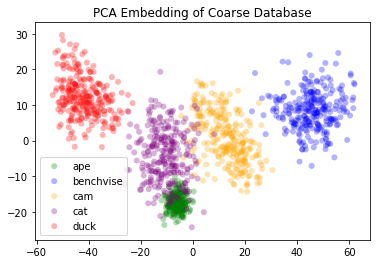

In [61]:
fig, ax = plt.subplots()

color_coding = {
    'ape': 'green', 'benchvise': 'blue', 'cam': 'orange', 'cat': 'purple', 'duck': 'red'
}

start_idx = 0
for klass in dataset.dataset_coarse:
    end_idx = start_idx + len(dataset.dataset_coarse[klass])
    sub_reps = reps[start_idx:end_idx, :]

    ax.scatter(sub_reps[:, 0], sub_reps[:, 1], c=color_coding[klass], label=klass, alpha=0.3, edgecolors='none')

    start_idx = end_idx

ax.legend()
ax.set_title("PCA Embedding of Coarse Database")
# ax.grid(True)

In [76]:
pca = PCA(n_components=2)
reps = pca.fit_transform(test_features)

Text(0.5,1,'PCA Embedding of Test Database')

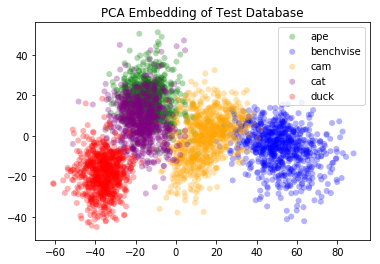

In [77]:
fig, ax = plt.subplots()

color_coding = {
    'ape': 'green', 'benchvise': 'blue', 'cam': 'orange', 'cat': 'purple', 'duck': 'red'
}

start_idx = 0
for klass in dataset.dataset_test:
    end_idx = start_idx + len(dataset.dataset_test[klass])
    sub_reps = reps[start_idx:end_idx, :]

    ax.scatter(sub_reps[:, 0], sub_reps[:, 1], c=color_coding[klass], label=klass, alpha=0.3, edgecolors='none')

    start_idx = end_idx

ax.legend()
ax.set_title("PCA Embedding of Test Database")
# ax.grid(True)

In [ ]:
tsne = TSNE(n_components=2)
reps = tsne.fit_transform(coarse_features)

Text(0.5,1,'t-SNE Embedding of Coarse Database')

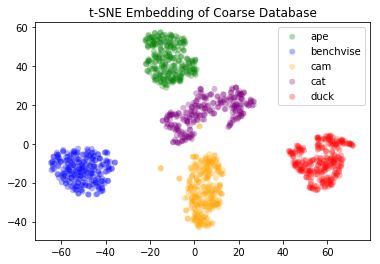

In [59]:
fig, ax = plt.subplots()

color_coding = {
    'ape': 'green', 'benchvise': 'blue', 'cam': 'orange', 'cat': 'purple', 'duck': 'red'
}

start_idx = 0
for klass in dataset.dataset_coarse:
    end_idx = start_idx + len(dataset.dataset_coarse[klass])
    sub_reps = reps[start_idx:end_idx, :]

    ax.scatter(sub_reps[:, 0], sub_reps[:, 1], c=color_coding[klass], label=klass, alpha=0.3, edgecolors='none')

    start_idx = end_idx

ax.legend()
ax.set_title("t-SNE Embedding of Coarse Database")
# ax.grid(True)

In [70]:
tsne = TSNE(n_components=2)
reps = tsne.fit_transform(test_features)

Text(0.5,1,'t-SNE Embedding of Test Database')

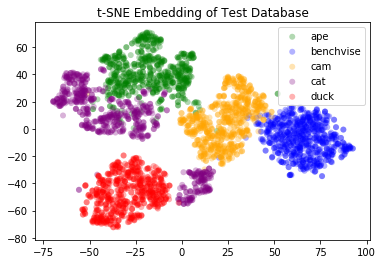

In [74]:
fig, ax = plt.subplots()

color_coding = {
    'ape': 'green', 'benchvise': 'blue', 'cam': 'orange', 'cat': 'purple', 'duck': 'red'
}

start_idx = 0
for klass in dataset.dataset_test:
    end_idx = start_idx + len(dataset.dataset_test[klass])
    sub_reps = reps[start_idx:end_idx, :]

    ax.scatter(sub_reps[:, 0], sub_reps[:, 1], c=color_coding[klass], label=klass, alpha=0.3, edgecolors='none')

    start_idx = end_idx

ax.legend()
ax.set_title("t-SNE Embedding of Test Database")
# ax.grid(True)

## Confusion Matrix

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Source:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
conf_mat = confusion_matrix(true_labels, pred_labels, labels=dataset.classes)

Confusion matrix, without normalization
[[500   1  16 185   5]
 [  0 689  18   0   0]
 [  0  19 660  28   0]
 [  8   0   7 675  17]
 [  0   0   0  11 696]]


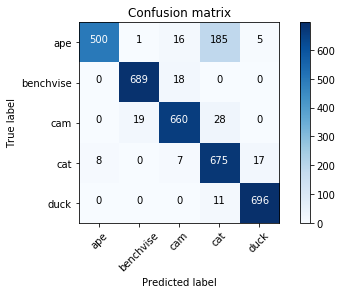

In [86]:
plot_confusion_matrix(conf_mat, classes=dataset.classes)